In [1]:
# Imports
import pandas as pd
import numpy as np
from igraph import Graph, plot


In [3]:
# Load data
data = pd.read_csv('./datasets/airports_us.csv.zip', compression='zip')


In [6]:
data

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
0,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254,2008-10-01,122049,86219,39.140999,-96.670799,NaN,NaN
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,147300,76034,42.374199,-122.873001,44.254101,-121.150002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606798,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",281,969,51,119,2009-02-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701
3606799,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",245,1026,54,119,2009-11-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701
3606800,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",363,1273,67,119,2009-08-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701
3606801,CGI,TBN,"Cape Girardeau, MO","Fort Leonard Wood, MO",2,19,1,146,2009-08-01,93712,46457,37.225300,-89.570801,37.741600,-92.140701


In [26]:
# Clean data
data.isnull().sum()
data.dropna(axis=0, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3594452 entries, 1 to 3606801
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Origin_airport          object 
 1   Destination_airport     object 
 2   Origin_city             object 
 3   Destination_city        object 
 4   Passengers              int64  
 5   Seats                   int64  
 6   Flights                 int64  
 7   Distance                int64  
 8   Fly_date                object 
 9   Origin_population       int64  
 10  Destination_population  int64  
 11  Org_airport_lat         float64
 12  Org_airport_long        float64
 13  Dest_airport_lat        float64
 14  Dest_airport_long       float64
dtypes: float64(4), int64(6), object(5)
memory usage: 438.8+ MB


In [29]:
# Drop duplicates
data.drop_duplicates(keep='first', inplace=True)
data.duplicated().sum()

0

In [30]:
data.shape

(3553360, 15)

In [31]:
# Separate unique airports codes
codes = data['Origin_airport'].unique().tolist()
codes.extend(data['Destination_airport'].unique().tolist())

# Get unique codes among origin and destination
codes = set(codes)


In [43]:
# Save codes
codes_df = pd.DataFrame(list(enumerate(codes, start=1)), \
                        columns=['id', 'codes'])

codes_df.to_csv('./datasets/airports_us_codes.csv', index=False)

In [13]:
airports = pd.read_csv('./datasets/airports_us_codes.csv')
airports.head()

,id,codes
0,1,BKW
1,2,DAL
2,3,GLH
3,4,MKG
4,5,MOB


In [61]:
codes_df_code_index = codes_df.set_index('codes').copy()
data['ORIG_CODE'] = data['Origin_airport'].apply(lambda code : codes_df_code_index.loc[code].values[0])

In [65]:
data['DEST_CODE'] = data['Destination_airport'].apply(lambda code : codes_df_code_index.loc[code].values[0])

In [68]:
data.to_parquet('./datasets/airports_us_coded.parquet')

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long,ORIG_CODE,DEST_CODE
1990866,CAE,CLT,"Columbia, SC","Charlotte, NC",3275,11680,80,89,1993-05-01,574867,1086132,33.938801,-81.119499,35.214001,-80.943100,169,435
2456891,ILN,BHM,"Wilmington, OH","Birmingham, AL",0,0,21,440,2005-11-01,42063,1090441,39.427898,-83.792099,33.562901,-86.753502,247,103
3478850,MDW,SFO,"Chicago, IL","San Francisco, CA",9206,11508,84,1855,2009-12-01,19161134,8635706,41.785999,-87.752403,37.618999,-122.375000,338,167
604985,ORD,ATL,"Chicago, IL","Atlanta, GA",1636,2718,9,606,1997-11-01,17405264,3756986,41.978600,-87.904800,33.636700,-84.428101,140,374
2792607,CLE,IAD,"Cleveland, OH","Washington, DC",1409,2337,123,288,2000-11-01,2147948,9642062,41.411701,-81.849800,38.944500,-77.455803,261,449
641144,ORD,ATL,"Chicago, IL","Atlanta, GA",8602,9100,91,606,2003-10-01,18572324,4673146,41.978600,-87.904800,33.636700,-84.428101,140,374
3388892,IND,PHL,"Indianapolis, IN","Philadelphia, PA",1004,1300,26,587,2008-07-01,1720796,11880992,39.717300,-86.294403,39.871899,-75.241096,219,310
459719,MCO,EWR,"Orlando, FL","Newark, NJ",482,540,5,938,1993-09-01,1334092,17013259,28.429399,-81.308998,40.692501,-74.168701,353,448
982481,CMH,DTW,"Columbus, OH","Detroit, MI",432,621,9,155,2004-04-01,1696238,8996622,39.998001,-82.891899,42.212399,-83.353401,208,181
17021,PDX,RNO,"Portland, OR","Reno, NV",6148,8091,57,444,1993-07-01,1653097,276956,45.588699,-122.598000,39.499100,-119.767998,154,177


In [2]:
data = pd.read_parquet('./datasets/airports_us_coded.parquet')

In [3]:
# Create relationships from a sample
data_sample = data.sample(1000)


In [4]:
data_sample = data_sample[['ORIG_CODE', 'DEST_CODE', 'Flights']]

In [17]:
edges = list(data_sample.apply(lambda row : (row['ORIG_CODE'], row['DEST_CODE']), axis=1).values)
weights = list(data['Flights'].values)

In [15]:
airports.codes.values

array(['BKW', 'DAL', 'GLH', 'MKG', 'MOB', 'BRO', 'FOE', 'ALM', 'AND',
       'ACT', 'PWM', 'SJT', 'LGU', 'CAK', 'HII', 'PUC', 'ITO', 'BNA',
       'ILM', 'SBN', 'AOO', 'DVT', 'NKX', 'PVU', 'PIH', 'IPL', 'SKY',
       'MKC', 'PDK', 'JHW', 'BTL', 'LEX', 'HVN', 'DDC', 'DEC', 'MQT',
       'SDM', 'OKK', 'JAN', 'MSN', 'POU', 'SJC', 'AUS', 'JXN', 'IAB',
       'LAM', 'CHO', 'SHD', 'FDY', 'OLS', 'GNV', 'EDF', 'EAT', 'ISM',
       'BWI', 'DRT', 'PGD', 'ALW', 'MSY', 'PIT', 'BAD', 'AST', 'AZA',
       'SBY', 'SAF', 'AUO', 'TCL', 'MWC', 'DSM', 'FFO', 'PWK', 'PBG',
       'HVR', 'EIL', 'OGD', 'DET', 'TIK', 'SAN', 'CDC', 'BZN', 'GRK',
       'AFW', 'STC', 'PIB', 'ACV', 'VAD', 'ISO', 'ABQ', 'MCF', 'UKI',
       'LSE', 'RKS', 'TBN', 'MHR', 'YIP', 'ABE', 'MIA', 'JAC', 'PGV',
       'BIL', 'RST', 'RAC', 'BHM', 'SAV', 'CMI', 'OWB', 'VIS', 'ERI',
       'ESN', 'ABI', 'FNT', 'GCK', 'MYR', 'LUF', 'RDD', 'LCK', 'HOT',
       'PNE', 'RCA', 'LAR', 'CWA', 'HKY', 'AVL', 'TYS', 'DFW', 'RKD',
       'BGM', 'GUP',

In [19]:
# Definição do grafo com as arestas
airports_graph = Graph(edges = edges, directed = True)
# Definição do rótulo de cada vértice
airports_graph.vs['label'] = airports.codes.values
airports_graph.vs['name'] = airports.id.values
airports_graph.es['weight'] = weights
print(airports_graph)

IGRAPH DNW- 484 1000 --
+ attr: label (v), name (v), weight (e)
+ edges (vertex names):
353->19, 380->262, 386->480, 136->141, 354->15, 126->225, 150->382, 98->449,
415->450, 450->393, 182->169, 126->412, 83->126, 150->231, 265->105, 141->274,
98->126, 354->265, 311->205, 367->126, 146->101, 449->182, 150->167, 262->126,
105->417, 380->412, 220->61, 452->382, 126->43, 480->141, 182->41, 417->375,
452->354, 317->182, 146->380, 19->236, 7->480, 297->311, 126->285, 406->449,
178->168, 61->311, 79->150, 126->11, 157->136, 61->209, 168->375, 168->131,
44->126, 213->412, 311->213, 221->417, 415->241, 375->135, 19->436, 126->44,
412->56, 285->141, 89->231, 168->79, 136->104, 98->182, 60->213, 224->167,
136->339, 339->311, 421->380, 449->436, 375->181, 343->126, 311->436,
141->220, 3->350, 265->415, 375->231, 354->311, 311->317, 234->368, 375->135,
157->308, 354->56, 450->311, 231->146, 417->182, 70->136, 141->251, 415->324,
380->428, 209->375, 354->417, 43->243, 229->415, 380->136, 417->436, 

In [ ]:
# Shape of the vertex. Known shapes are: rectangle, circle, hidden, triangle-up, triangle-down. Several aliases are also accepted, see drawing.known_shapes.

In [45]:
np.array(airports_graph.es['weight'])/100

array([0.22, 0.19, 0.04, 0.01, 0.01, 0.04, 0.01, 0.02, 0.01, 0.23, 0.2 ,
       0.22, 0.01, 0.23, 1.61, 0.3 , 1.87, 0.22, 1.54, 2.  , 0.25, 1.94,
       0.28, 0.26, 0.28, 1.77, 0.51, 1.7 , 0.54, 0.27, 0.26, 2.03, 1.79,
       1.69, 1.69, 0.26, 2.04, 0.22, 0.27, 0.23, 0.24, 0.25, 0.23, 0.23,
       0.24, 0.21, 0.27, 0.25, 0.92, 0.19, 0.25, 0.88, 0.86, 0.25, 0.93,
       0.25, 0.88, 0.22, 0.79, 0.25, 0.19, 0.22, 0.26, 0.83, 0.78, 0.83,
       0.23, 0.92, 0.17, 0.26, 0.85, 0.27, 0.22, 0.21, 0.2 , 0.01, 0.01,
       0.01, 0.18, 0.19, 0.2 , 0.21, 0.23, 0.23, 0.22, 0.2 , 0.21, 0.22,
       0.18, 0.23, 0.01, 0.24, 0.88, 0.25, 0.93, 0.89, 0.85, 0.23, 0.27,
       0.27, 0.23, 0.9 , 0.22, 0.22, 0.21, 0.19, 0.25, 0.21, 0.24, 0.93,
       0.22, 0.15, 0.19, 0.2 , 0.17, 0.23, 0.85, 0.83, 0.22, 0.27, 0.92,
       0.89, 0.22, 0.93, 0.26, 0.26, 0.73, 0.02, 0.02, 0.02, 0.01, 0.01,
       0.01, 0.02, 0.01, 0.03, 1.78, 2.07, 1.77, 1.97, 0.23, 1.76, 1.61,
       1.94, 0.51, 0.31, 0.51, 1.83, 1.66, 0.07, 1.

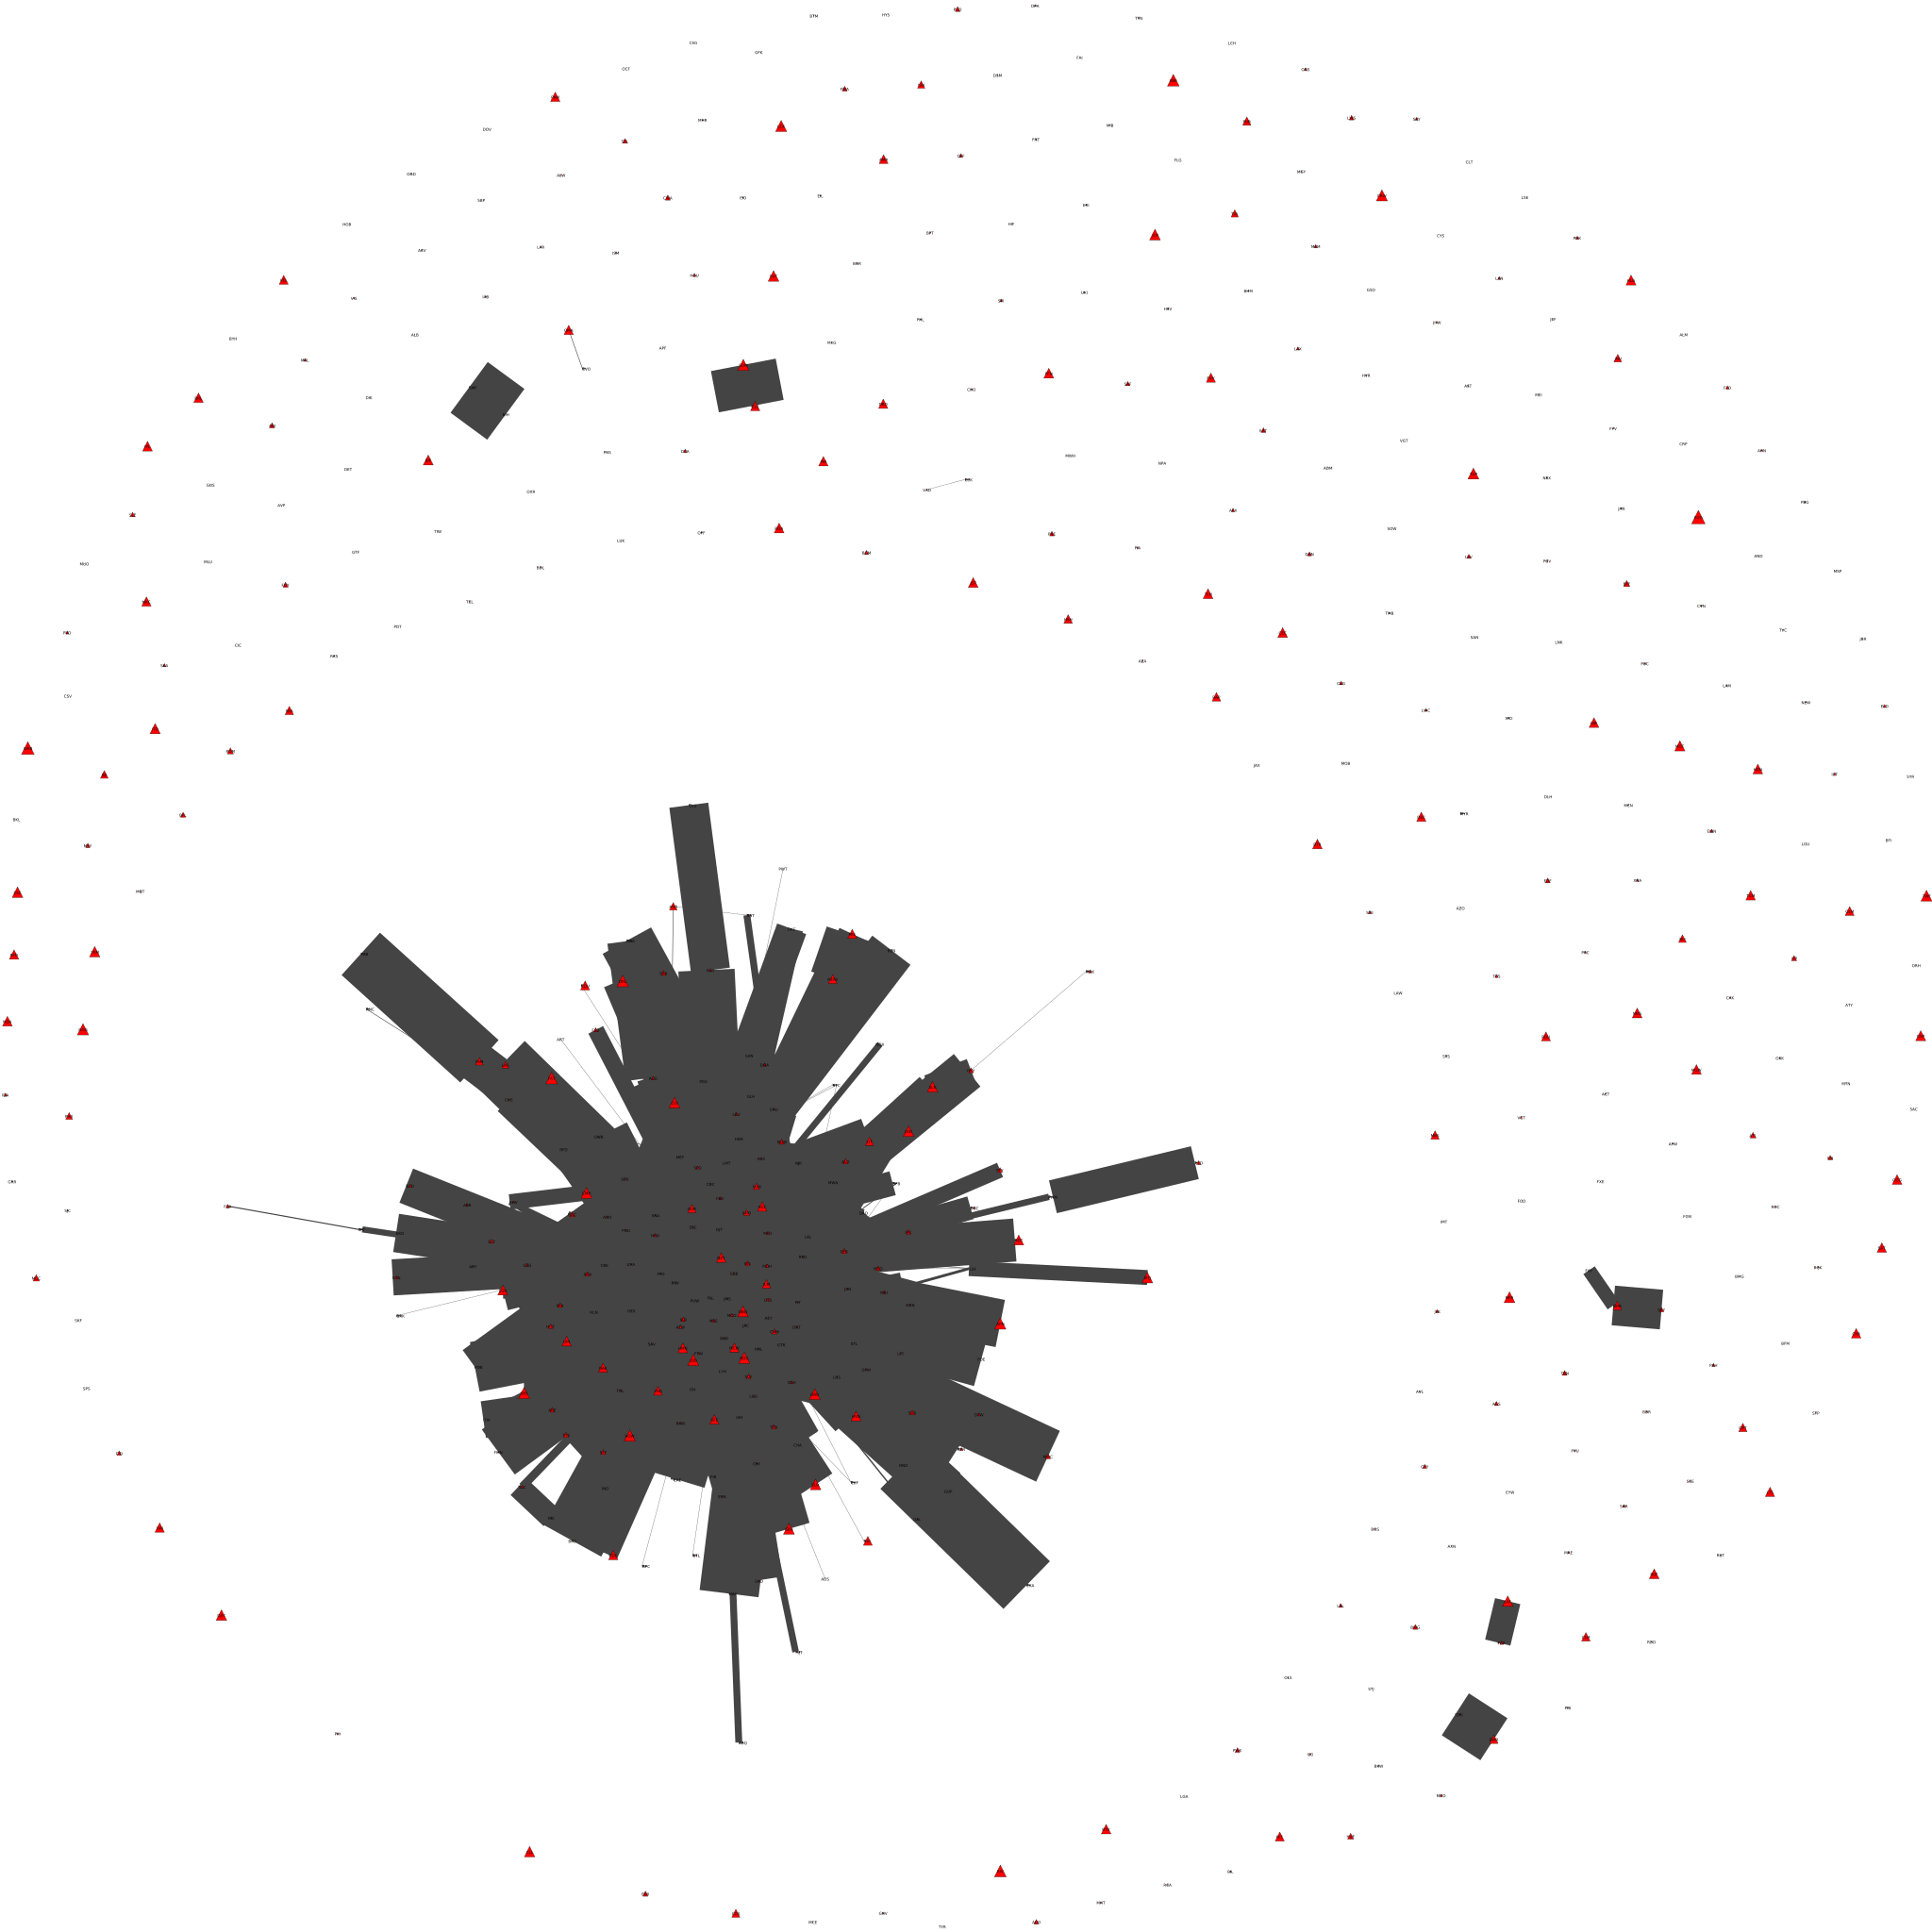

In [51]:
#gráfico
scale = 5
side = 7_000

plot(airports_graph, bbox = (0,0,side,side), 
     edge_width = airports_graph.es['weight'], \
     vertex_size = np.array(airports_graph.es['weight'])/5, \
     egde_label = np.array(airports_graph.es['weight'])/10_000, \
     edge_curved = 0.0, \
     vertex_shape = 'triangle-up' 
     )

In [ ]:
# Stablish weights
# Plot graphos